In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# loading the heart stroke dataset to a pandas DataFrame
# strokes_dataset = pd.read_csv('C:/Users/Priyanshu/Desktop/py/Capstone/dataset/healthcaredata.csv')
strokes_dataset = pd.read_csv('C:/Users/Priyanshu/Desktop/healthcare-dataset-stroke-data.csv')

In [12]:
# printing the first 5 rows of the dataset
strokes_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# number of rows and Columns in this dataset
strokes_dataset.shape

(5110, 12)

In [14]:
# getting the statistical measures of the data
strokes_dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
# Replacing missing NA values in 'bmi' with their mean bmi of their gender

F_missing_bmi_index = strokes_dataset[(strokes_dataset.gender == 'Female') & (strokes_dataset.bmi.isna())].index
strokes_dataset.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = strokes_dataset[(strokes_dataset.gender == 'Male') & (strokes_dataset.bmi.isna())].index
strokes_dataset.loc[M_missing_bmi_index, 'bmi'] = 28

In [4]:
# Removing the one instance where gender is 'Other' 

other_index = strokes_dataset[strokes_dataset['gender'] =='Other'].index
strokes_dataset = strokes_dataset.drop(other_index)

In [5]:
strokes_dataset['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

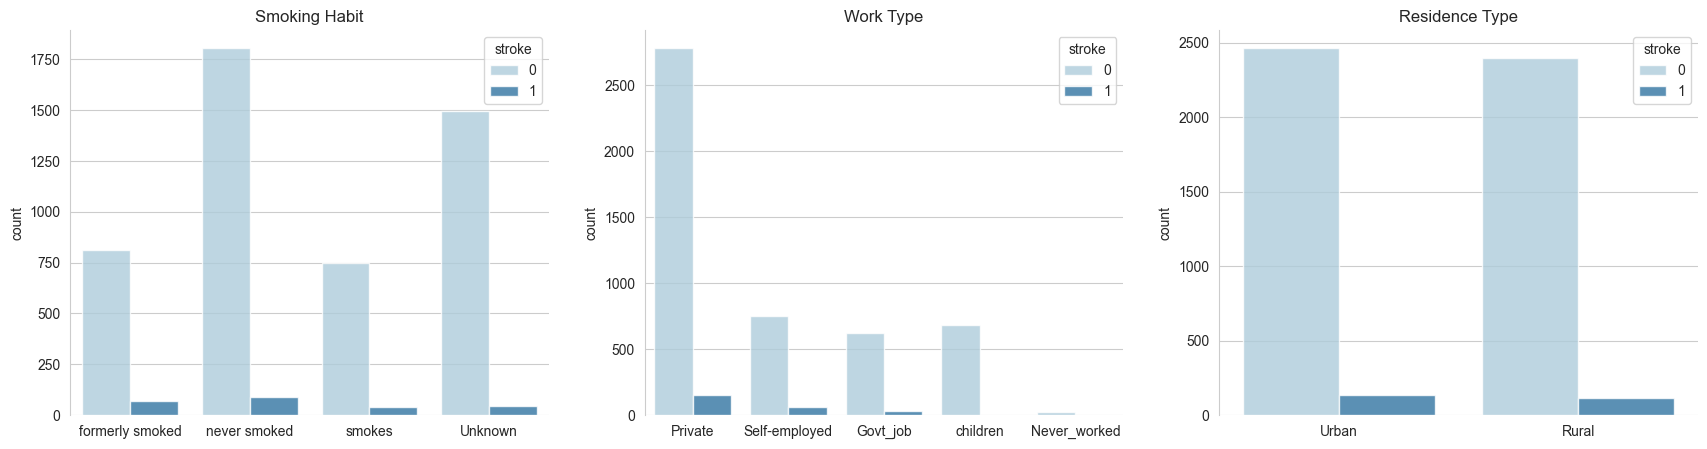

In [7]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=strokes_dataset['smoking_status'], alpha=0.8, palette="Paired",hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Habit');
plt.subplot(1,3,2)
sns.countplot(x=strokes_dataset['work_type'], alpha=0.8, palette="Paired", hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x=strokes_dataset['Residence_type'], alpha=0.8, palette="Paired", hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');

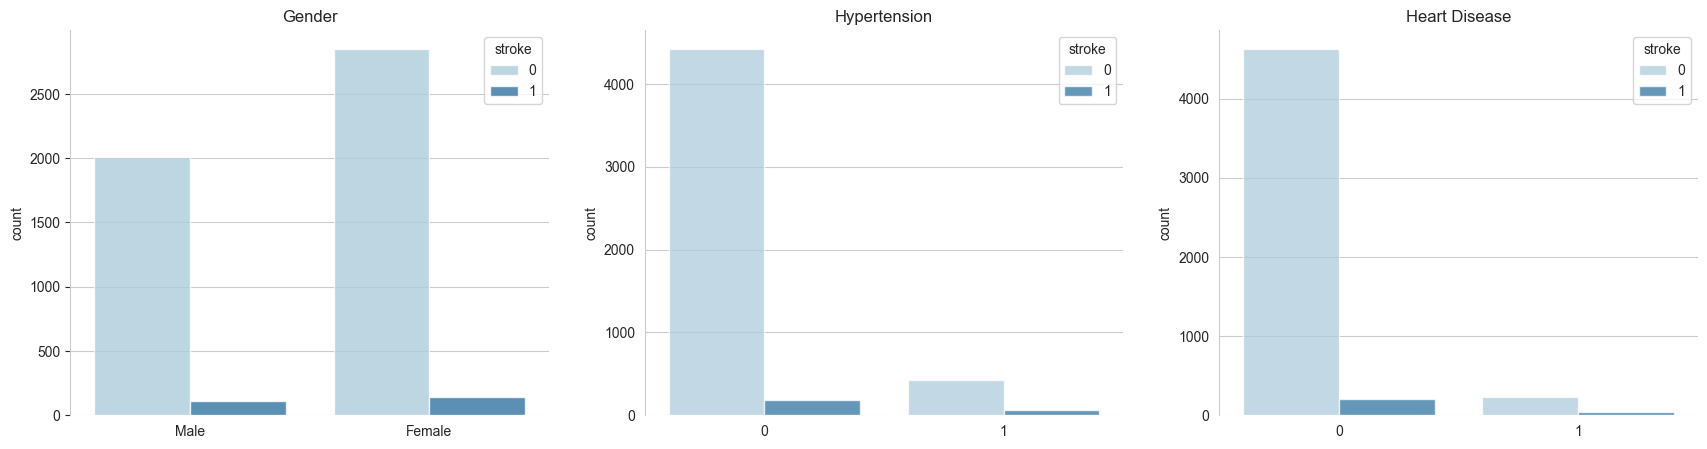

In [8]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.countplot(x=strokes_dataset['gender'], alpha=0.8, palette="Paired", hue=strokes_dataset['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender');
plt.subplot(1,3,2)
sns.countplot(x=strokes_dataset['hypertension'], alpha=0.75, palette="Paired", hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');
plt.subplot(1,3,3)
sns.countplot(x=strokes_dataset['heart_disease'], alpha=0.75, palette="Paired", hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

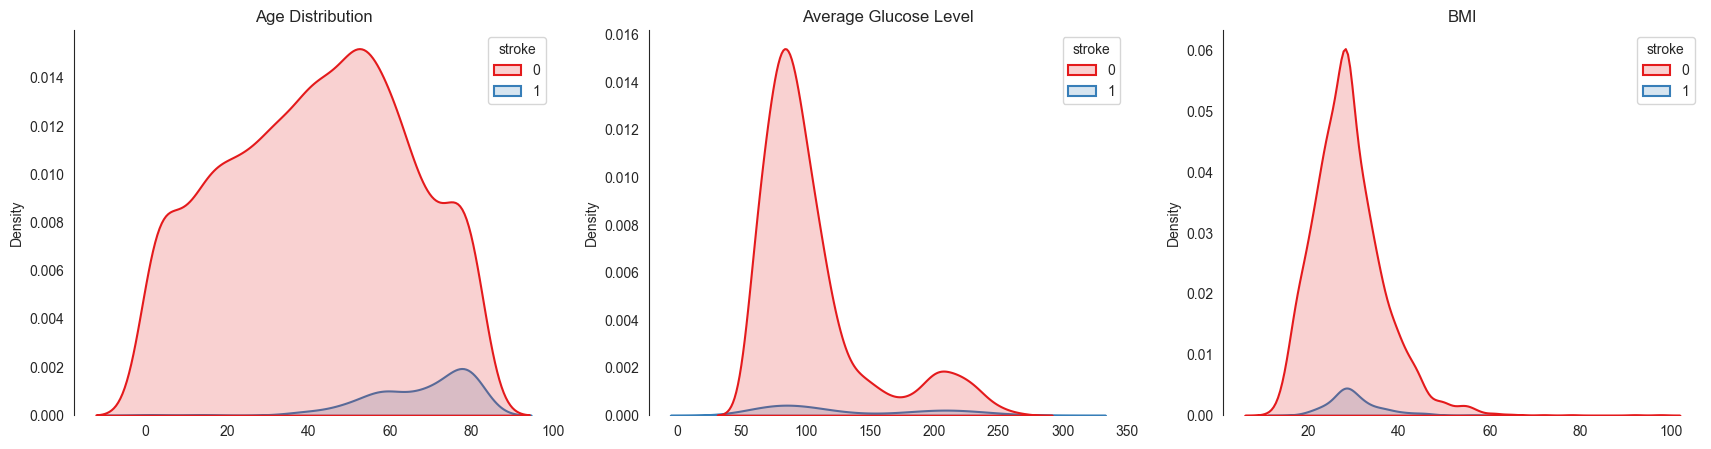

In [20]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=strokes_dataset['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');
plt.subplot(1,3,2)
sns.kdeplot(x=strokes_dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x=strokes_dataset['bmi'], alpha=0.2, palette="Set1", label='BMI',shade=True, linewidth=1.5, fill=True, hue=strokes_dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

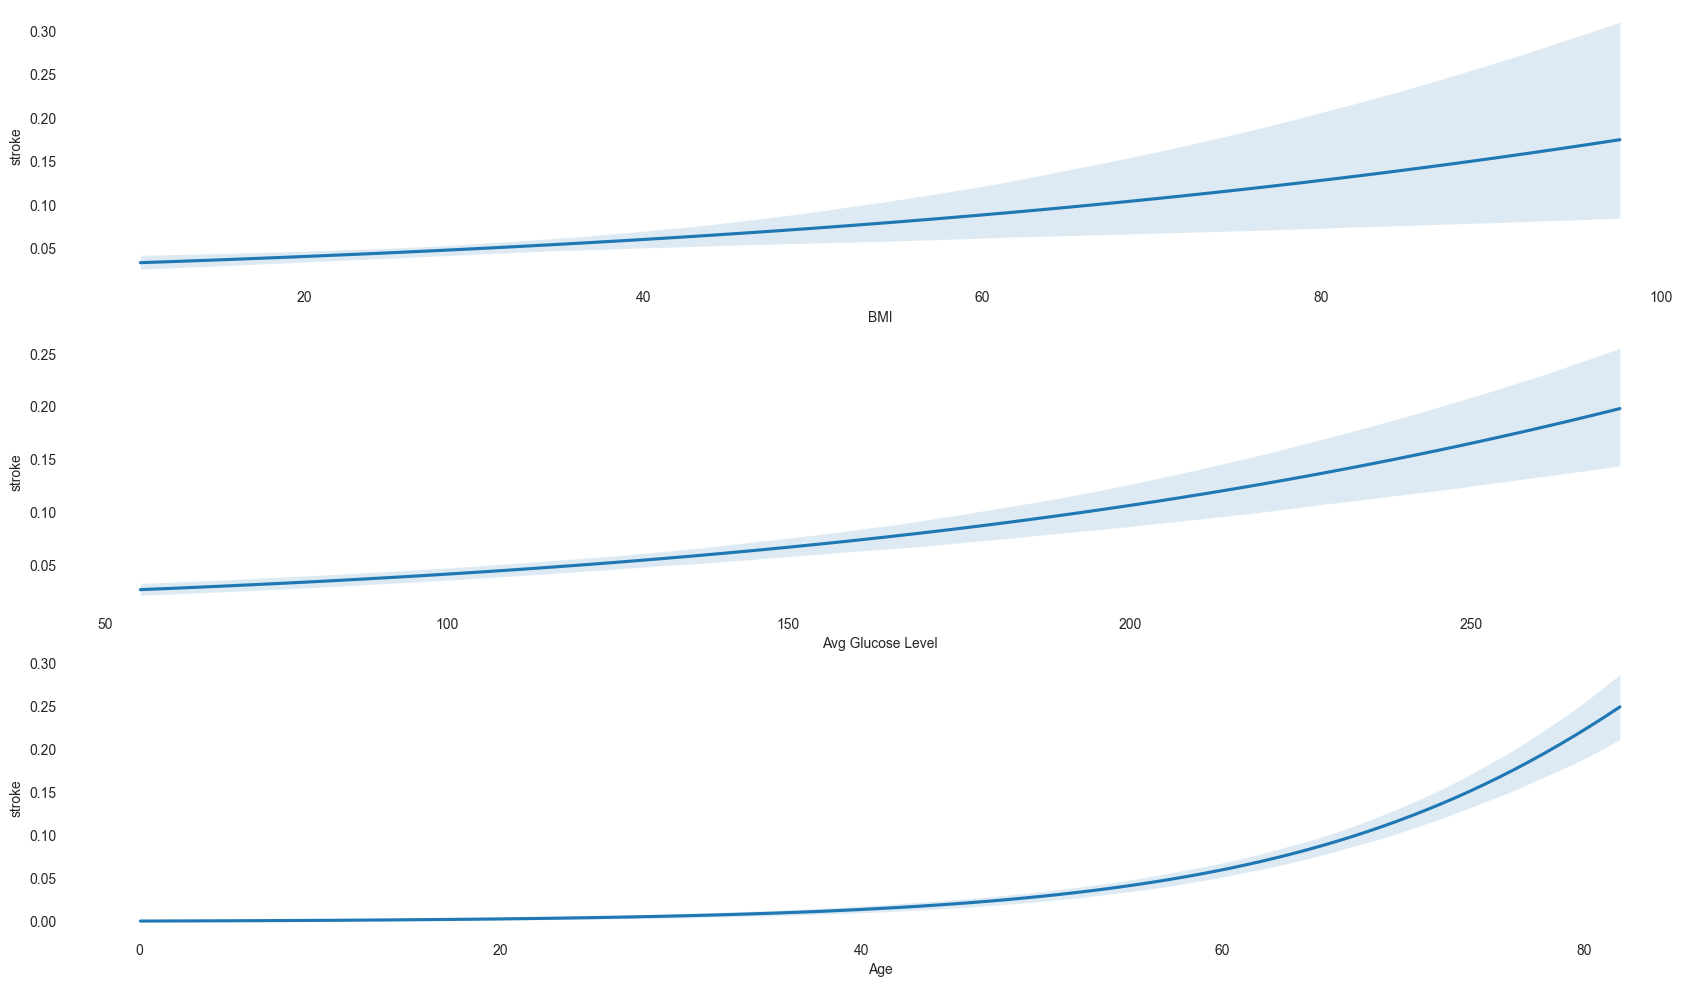

In [21]:
#@title Code
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,12));

plt.subplot(3,1,1)
sns.regplot(x=strokes_dataset['bmi'], y=strokes_dataset['stroke'], scatter=False, logistic=True, label= 'BMI');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');

plt.subplot(3,1,2)
sns.regplot(x=strokes_dataset['avg_glucose_level'], y=strokes_dataset['stroke'], scatter=False, logistic=True, label='Avg Glucose Level');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Avg Glucose Level');
plt.subplot(3,1,3)
sns.regplot(x=strokes_dataset['age'], y=strokes_dataset['stroke'], scatter=False, logistic=True, label='Age');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Age');

In [23]:
# Encoding categorical values

strokes_dataset['gender'] = strokes_dataset['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
strokes_dataset['Residence_type'] = strokes_dataset['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
strokes_dataset['work_type'] = strokes_dataset['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
strokes_dataset['ever_married'] = strokes_dataset['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
strokes_dataset['smoking_status'] = strokes_dataset['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [24]:
# separating the data and labels
X = strokes_dataset.drop(['stroke', 'id'], axis=1)
Y = strokes_dataset['stroke']

In [25]:
# SVM Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM', SVC(random_state=42, probability=True))])

In [26]:
# RF Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF', RandomForestClassifier(n_estimators = 135))])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=2)

In [28]:
# Our data is biased, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, Y_train_resh = oversample.fit_resample(X_train, Y_train.ravel())

In [29]:
# SVM model
from sklearn.model_selection import train_test_split,cross_val_score
svm_cv = cross_val_score(svm_pipeline,X_train_resh,Y_train_resh,cv=10,scoring='f1')
svm_cv.mean()

0.8502457125518363

In [30]:
# RF model
from sklearn.model_selection import train_test_split,cross_val_score
rf_cv = cross_val_score(rf_pipeline,X_train_resh,Y_train_resh,cv=10,scoring='f1')
rf_cv.mean()

0.9382686728562479

In [31]:
# SVM
svm_pipeline.fit(X_train_resh,Y_train_resh);
svm_train_predict = svm_pipeline.predict(X_train)
svm_pred = svm_pipeline.predict(X_test)

In [32]:
# RF
rf_pipeline.fit(X_train_resh,Y_train_resh);
rf_train_predict = rf_pipeline.predict(X_train)
rf_pred = rf_pipeline.predict(X_test)

In [33]:
svm_auc = accuracy_score(Y_test,svm_pred)
# Accuracies SVM
print('---- SVM ----')
print('Accuracy Score: ',accuracy_score(Y_test,svm_pred))
#print('Accuracy Score: ',accuracy_score(Y_train,svm_train_predict))

rf_auc = accuracy_score(Y_test,rf_pred)
# Accuracies RF
print('---- RF ----')
print('Accuracy Score: ',accuracy_score(Y_test,rf_pred))
#print('Accuracy Score: ',accuracy_score(Y_train,rf_train_predict))

---- SVM ----
Accuracy Score:  0.7782126549249837
---- RF ----
Accuracy Score:  0.8864970645792564


In [27]:
#input_data = (gender:=2, age:=78, hypertension:=1, heart_disease:=1, ever_married:=1, work_type:=1, Residence_type:=1, avg_glucose_level:=285.69, bmi:=26.2, smoking_status:=1)
input_data = (1,99,1,1,1,1,1,295.84,21.5,1)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

svm_prediction = svm_pipeline.predict(input_data_reshaped)
rf_prediction = rf_pipeline.predict(input_data_reshaped)

svm_res = ''
rf_res = ''
# print(prediction)

if (svm_prediction[0] == 0):
  print('The person is not under the risk of stroke')
  svm_res = 'The person is not under the risk of stroke'
else:
  print('The person is under the risk of stroke')
  svm_res = 'The person is under the risk of stroke'

if (rf_prediction[0] == 0):
  print('The person is not under the risk of stroke')
  rf_res = 'The person is not under the risk of stroke'
else:
  print('The person is under the risk of stroke')
  rf_res = 'The person is under the risk of stroke'

The person is under the risk of stroke
The person is under the risk of stroke


C:\Users\Priyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Priyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
if(svm_auc > rf_auc):
    print(svm_res)
else:
    print(rf_res)

The person is under the risk of stroke
